In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import os

ROOT = "."
FIGURES_FOLDER = ROOT + f"/Figures/Qualitative analysis/"

if not os.path.exists(FIGURES_FOLDER):
    os.mkdir(FIGURES_FOLDER)

In [3]:
def G(rho, p, P):
  return p*(1-rho/P)

# 1D parameter derivation:
# delta^2 / (1*tau) -> D for delta, tau -> 0
# Du = theta_u * D
# Di = theta_i * D

tau = 0.2 # h
Du = Di = 1.88e-4 # mm^2/h
beta = 1.02e-1 # h-1
p = 1.87e-2 # h-1
q = 4.17e-2 # h-1
P = K = 1e3 # 1/mm^2
Ru = 2.6 # mm
Ri = 1 # mm
pop_unit = 1

408.82 91.59
154.92957746478876


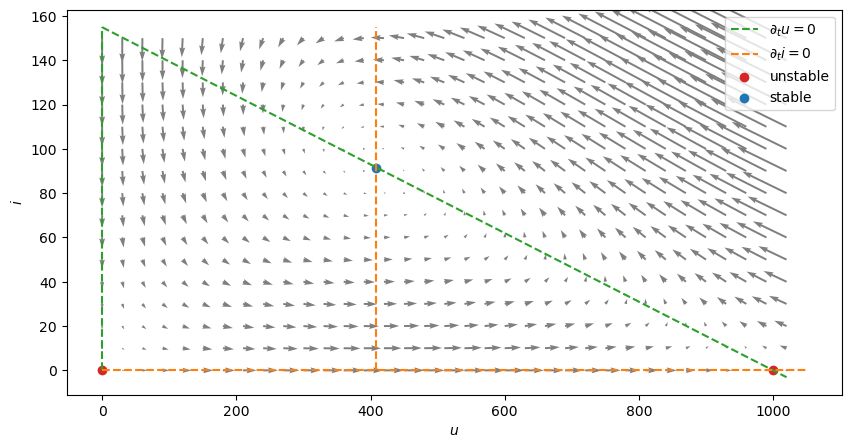

In [5]:
# define functions and parameters to save and plot results
u_eq = q*K/beta
i_eq = (p*K*(beta-q))/(beta*(beta+p))
print(np.round(u_eq,2), np.round(i_eq,2))

uu = np.arange(0,1050, 30)
ii = np.arange(0,160, 10)
U, I = np.meshgrid(uu,ii)

d_u = p*U*(1-(I+U)/K)-(beta/K)*U*I
ii_d_u_zero = uu*(p/(-p-beta)) + p*K/(p+beta)
print(p*K/(p+beta))
uu_d_i_zero = q*K/beta
d_i = (beta/K)*U*I - q*I

plt.figure(figsize=(10,5))
plt.quiver(U, I, d_u, d_i, color="tab:grey")
plt.plot(uu, ii_d_u_zero, linestyle="dashed",color="tab:green",  label=r"$\partial_t u = 0$")
plt.vlines([uu_d_i_zero], 0, p*K/(p+beta), colors="tab:orange", linestyle="dashed", label=r"$\partial_t i = 0$")
plt.vlines([0], 0, p*K/(p+beta), linestyle="dashed",color="tab:green")
plt.hlines(0,0,1050, colors="tab:orange", linestyle="dashed")
plt.scatter([0, K], [0, 0], color="tab:red", label="unstable")
plt.scatter(u_eq, i_eq, color="tab:blue", label="stable")
plt.xlabel(r"$u$")
plt.ylabel(r"$i$")
plt.legend()
# plt.savefig(f"{FIGURES_FOLDER}/space_homogeneous_phase.svg", format='svg', dpi=200)
plt.show()

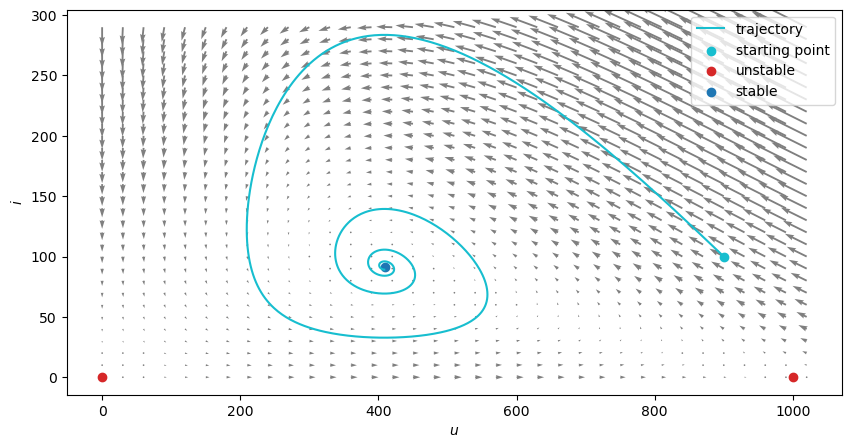

In [11]:
def equations(x, t):
  u, i = x  # membrane potential and recovery variable
  u_t = p*u*(1-(u+i)/K) - (beta/K)*u*i
  i_t = (beta/K)*u*i - q*i
  return [u_t, i_t]

initial_state = [.9*K, .1*K]
y = odeint(equations, initial_state, np.arange(0,1100,1))
y = y.T

uu = np.arange(0,1050, 30)
ii = np.arange(0,max(y[1]+10), 10)
U, I = np.meshgrid(uu,ii)

d_u = p*U*(1-(I+U)/K)-(beta/K)*U*I
d_i = (beta/K)*U*I - q*I

plt.figure(figsize=(10,5))
plt.quiver(U, I, d_u, d_i, color="tab:grey")
plt.plot(y[0],y[1], color="tab:cyan", label="trajectory")
plt.scatter(initial_state[0], initial_state[1],color="tab:cyan", label="starting point")
plt.scatter([0, K], [0, 0], color="tab:red", label="unstable")
plt.scatter(u_eq, i_eq, color="tab:blue", label="stable")

plt.xlabel(r"$u$")
plt.ylabel(r"$i$")
plt.legend()


# plt.savefig(f"{FIGURES_FOLDER}/space_homogeneous_trajectory.svg", format='svg', dpi=200)

0.08740098467210526
92.32444035571913


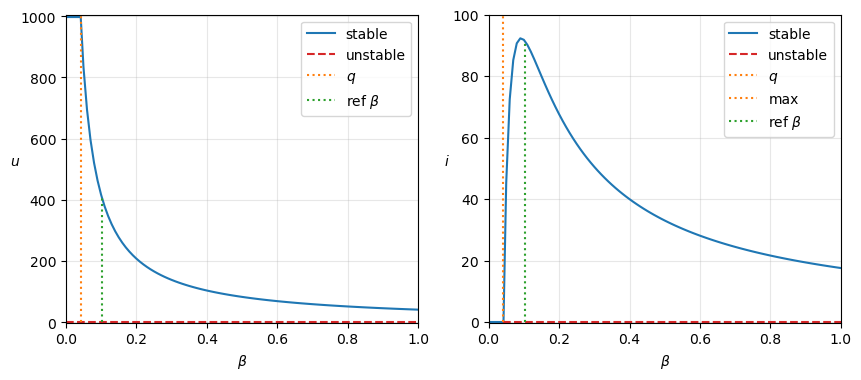

In [7]:
betas = np.arange(0.01, 1.1, 0.01)
u_eqs = q*K/betas
i_eqs = (p*K*(betas-q))/(betas*(betas+p))
beta_max = q+np.sqrt(q**2+p*p)
print(beta_max)
print(max(i_eqs))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(betas, u_eqs, label="stable")
plt.hlines([0], 0, 1, linestyle="dashed", color="tab:red", label="unstable")
plt.hlines([K], 0, q, linestyle="solid", color="tab:blue", linewidth=3)
plt.vlines([q], 0, K, linestyle="dotted", color="tab:orange", label=r"$q$")
plt.vlines([beta], 0, u_eq, linestyle="dotted", color="tab:green", label=r"ref $\beta$")
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$u$", rotation=0)
plt.ylim([-1,K+5])
plt.xlim([0,1])
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(betas, i_eqs, label="stable")
plt.hlines([0], 0, q,linestyle="solid", color="tab:blue")
plt.hlines([0], q, 1,linestyle="dashed", color="tab:red", label="unstable")
plt.vlines([q], 0, K, linestyle="dotted", color="tab:orange", label=r"$q$")
plt.vlines([], 0, K, linestyle="dotted", color="tab:orange", label=r"max")
plt.vlines([beta], 0, i_eq, linestyle="dotted", color="tab:green", label=r"ref $\beta$")
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$i$", rotation=0)
plt.ylim([-0.2,100])
plt.xlim([0,1])
plt.grid(alpha=0.3)
# plt.savefig(f"{FIGURES_FOLDER}/i_u_X_beta_bifurcation.svg", format='svg', dpi=200)
plt.show()

156.44849489091413


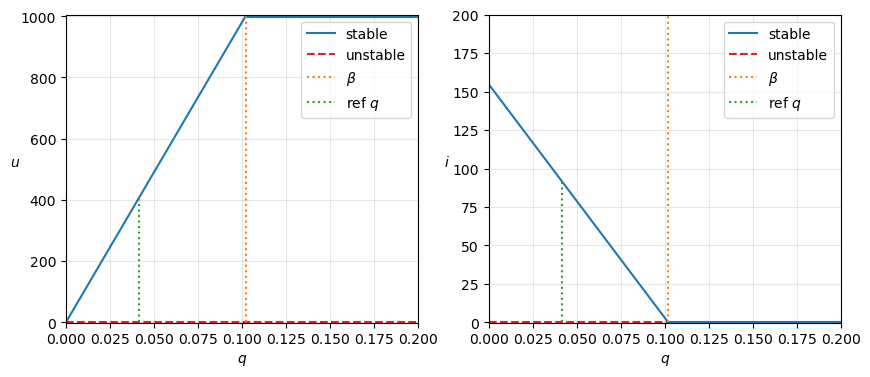

In [8]:
qs = np.arange(-0.001, 0.2, 0.001)
u_eqs = qs*K/beta
i_eqs = (p*K*(beta-qs))/(beta*(beta+p))
print(max(i_eqs))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(qs, u_eqs, label="stable")
plt.hlines([0], 0, 1, linestyle="dashed", color="tab:red", label="unstable")
plt.hlines([K], beta, 1, linestyle="solid", color="tab:blue", linewidth=3)
plt.vlines([beta], 0, K, linestyle="dotted", color="tab:orange", label=r"$\beta$")
plt.vlines([q], 0, u_eq, linestyle="dotted", color="tab:green", label=r"ref $q$")
plt.legend()
plt.xlabel(r"$q$")
plt.ylabel(r"$u$", rotation=0)
plt.ylim([-1,K+5])
plt.xlim([0,0.2])
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(qs, i_eqs, label="stable")
plt.hlines([0], 0, beta, linestyle="dashed", color="tab:red", label="unstable")
plt.hlines([0], beta, 1,linestyle="solid", color="tab:blue")
plt.vlines([beta], 0, K, linestyle="dotted", color="tab:orange", label=r"$\beta$")
plt.vlines([q], 0, i_eq, linestyle="dotted", color="tab:green", label=r"ref $q$")
plt.legend()
plt.xlabel(r"$q$")
plt.ylabel(r"$i$", rotation=0)
plt.ylim([-0.2,200])
plt.xlim([0,0.2])
plt.grid(alpha=0.3)
# plt.savefig(f"{FIGURES_FOLDER}/i_u_X_q_bifurcation.svg", format='svg', dpi=200)
plt.show()

In [9]:
print(p*K*beta/(beta**2+beta*p))

154.92957746478876


490.84369188607224


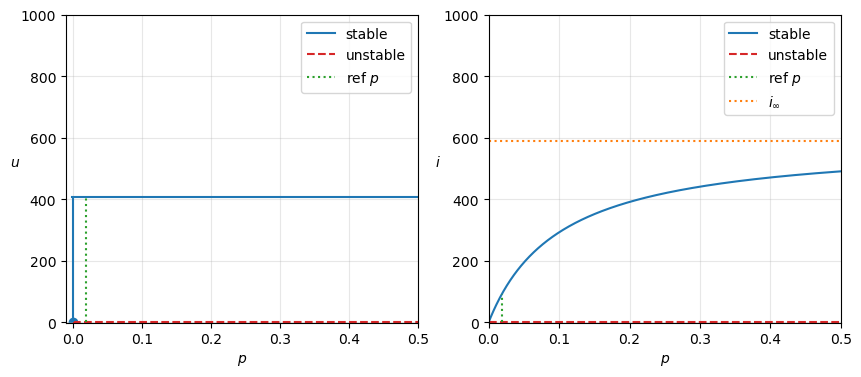

In [10]:
ps = np.arange(-0.001, 0.5, 0.001)
u_eqs = np.ones(ps.shape)*q*K/beta
i_eqs = (ps*K*(beta-q))/(beta*(beta+ps))
print(max(i_eqs))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ps, u_eqs, label="stable")
plt.hlines([0], 0, 1, linestyle="dashed", color="tab:red", label="unstable")
plt.vlines([0], 0, u_eq, linestyle="solid", color="tab:blue")
plt.scatter(0, 0, color="tab:blue")
plt.vlines([p], 0, u_eq, linestyle="dotted", color="tab:green", label=r"ref $p$")
plt.legend()
plt.xlabel(r"$p$")
plt.ylabel(r"$u$", rotation=0)
plt.ylim([-1,K])
plt.xlim([-0.01,0.5])
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(ps, i_eqs, label="stable")
plt.hlines([0], 0, 1, linestyle="dashed", color="tab:red", label="unstable")
plt.vlines([p], 0, i_eq, linestyle="dotted", color="tab:green", label=r"ref $p$")
plt.hlines([K-u_eq], 0, 1, linestyle="dotted", color="tab:orange", label=r"$i_{\infty}$")
plt.legend()
plt.xlabel(r"$p$")
plt.ylabel(r"$i$", rotation=0)
plt.ylim([-1,K])
plt.xlim([0,0.5])
plt.grid(alpha=0.3)
# plt.savefig(f"{FIGURES_FOLDER}/i_u_X_p_bifurcation.svg", format='svg', dpi=200)
plt.show()